In [1]:
from google.colab import files
uploaded = files.upload()

Saving MSN.csv to MSN.csv


In [2]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("MSN.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"89,000","89,000","89,200","88,200",683.44K,0.11%
1,3/4/2019,"89,500","89,100","91,400","89,000",1.28M,0.56%
2,3/5/2019,"89,400","89,500","90,900","89,300",772.09K,-0.11%
3,3/6/2019,"90,000","90,000","90,200","89,300",695.52K,0.67%
4,3/7/2019,"90,000","90,700","91,000","89,800",947.51K,0.00%
...,...,...,...,...,...,...,...
1310,5/29/2024,"75,000","75,700","76,900","75,000",8.00M,-0.66%
1311,5/30/2024,"77,200","74,300","77,400","74,100",11.16M,2.93%
1312,5/31/2024,"76,600","78,000","78,400","76,600",5.59M,-0.78%
1313,6/3/2024,"77,700","77,300","78,500","76,800",6.57M,1.44%


In [4]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,89000.0,"89,000","89,200","88,200",683.44K,0.11%
1,2019-03-04,89500.0,"89,100","91,400","89,000",1.28M,0.56%
2,2019-03-05,89400.0,"89,500","90,900","89,300",772.09K,-0.11%
3,2019-03-06,90000.0,"90,000","90,200","89,300",695.52K,0.67%
4,2019-03-07,90000.0,"90,700","91,000","89,800",947.51K,0.00%
...,...,...,...,...,...,...,...
1310,2024-05-29,75000.0,"75,700","76,900","75,000",8.00M,-0.66%
1311,2024-05-30,77200.0,"74,300","77,400","74,100",11.16M,2.93%
1312,2024-05-31,76600.0,"78,000","78,400","76,600",5.59M,-0.78%
1313,2024-06-03,77700.0,"77,300","78,500","76,800",6.57M,1.44%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1315 non-null   datetime64[ns]
 1   Price     1315 non-null   float64       
 2   Open      1315 non-null   object        
 3   High      1315 non-null   object        
 4   Low       1315 non-null   object        
 5   Vol.      1315 non-null   object        
 6   Change %  1315 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.0+ KB


<h1>Split the data into training, testing arcording to 7:3

In [6]:
# Split the data into training, testing arcording to 7:3
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]


In [7]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16631.011, Time=3.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16632.346, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16628.372, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16628.251, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16630.350, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16630.221, Time=0.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16630.182, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16631.357, Time=1.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16626.260, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16628.231, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=16628.190, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16626.381, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=16629.363, Time=0.78 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.034 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [10]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331]


In [11]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331]
Predicted closing prices for the next 90 days:
[85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 8558

In [12]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 13291.524414582127
Testing MAE: 11674.730251448455
Testing MAPE: 16.14433926593557


In [13]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

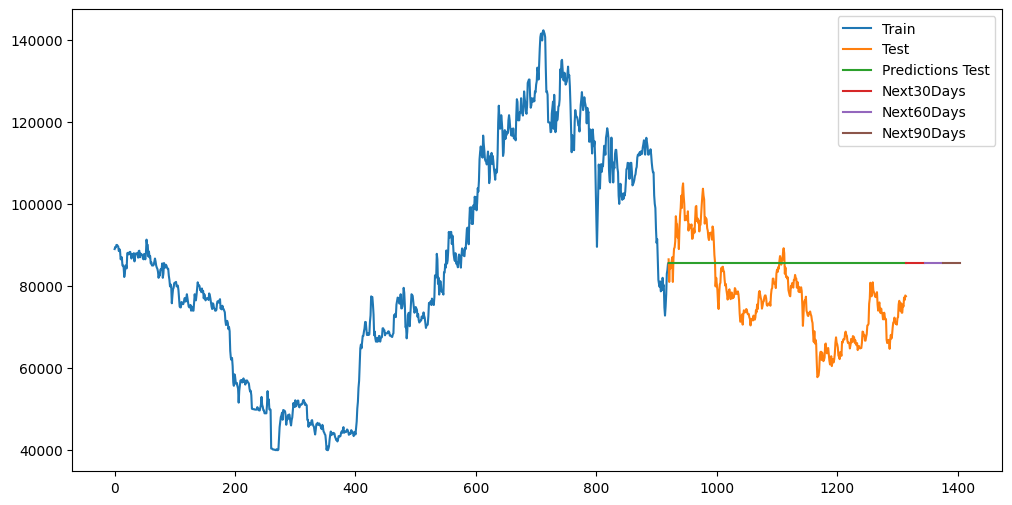

In [14]:
# Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predictions Test','Next30Days','Next60Days','Next90Days'])
plt.show()

<h1># Split the data into training, testing arcording to 8:2




In [15]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [16]:
#  Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19044.311, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19044.741, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19042.453, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19042.434, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19042.796, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19044.434, Time=0.72 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19044.441, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19044.269, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=19040.504, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=19042.504, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=19042.510, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=19040.524, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=19042.320, Time=0.56 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.933 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
#  Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [18]:
#  Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002]


In [19]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002]
Predicted closing prices for the next 90 days:
[73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 73265.71036002 73265.71036002 73265.71036002
 73265.71036002 7326

In [20]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100


print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 6898.675830374893
Testing MAE: 5790.178996655172
Testing MAPE: 8.190549301340546


In [21]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

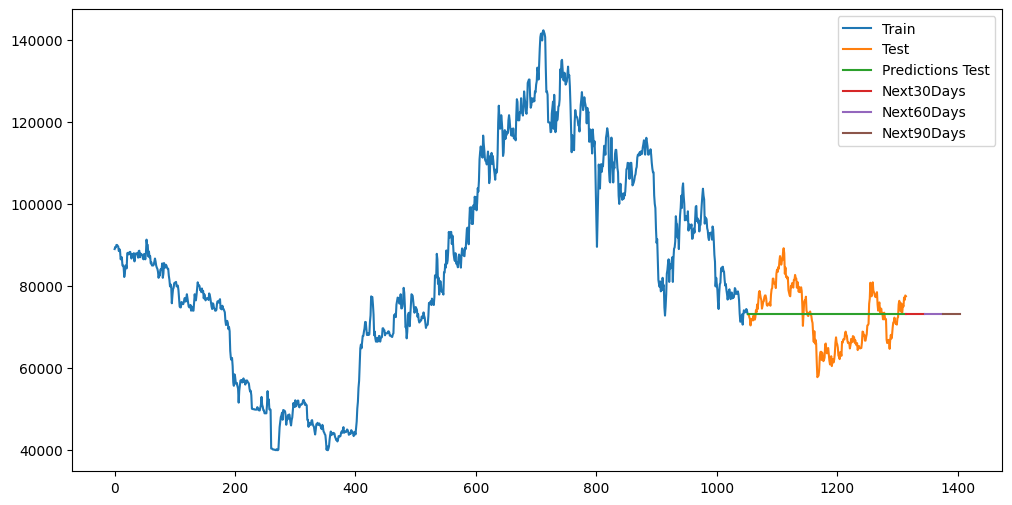

In [22]:
# 8.Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predictions Test','Next30Days','Next60Days','Next90Days'])
plt.show()

<h1># Split the data into training, testing arcording to 9:1

In [23]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [24]:
#  Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21359.762, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21361.045, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21358.263, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21358.241, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21359.173, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21360.241, Time=0.78 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=21360.248, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21360.010, Time=0.98 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=21356.389, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=21358.388, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=21358.394, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=21356.412, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=21358.116, Time=0.35 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.567 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [25]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [26]:
#  Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858]


In [27]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858]
Predicted closing prices for the next 90 days:
[64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 64015.40322858 64015.40322858 64015.40322858
 64015.40322858 6401

In [28]:
# 7. Tính RMSE, MSE, MAPE

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 7405.47478258364
Testing MAE: 5798.646136788715
Testing MAPE: 7.944874645753989


In [29]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

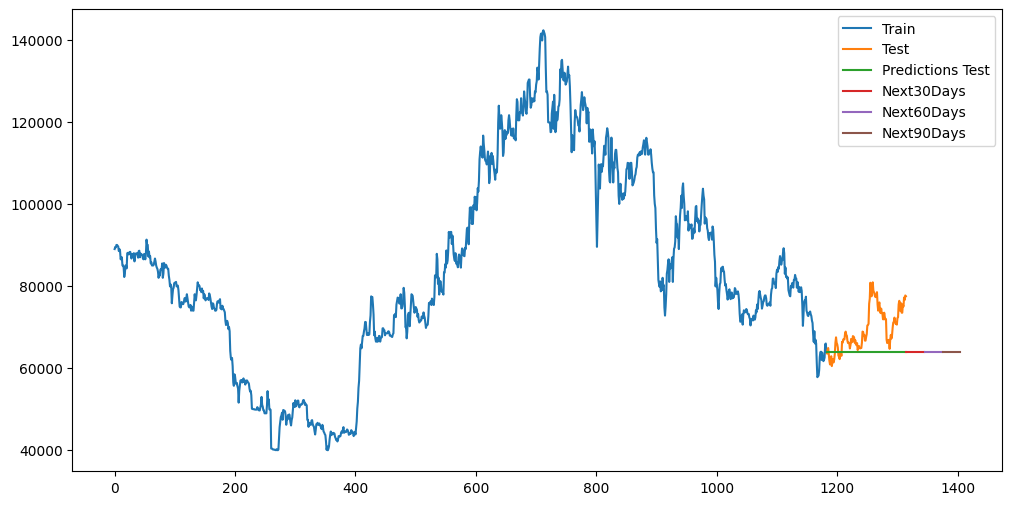

In [30]:
# Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predictions Test','Next30Days','Next60Days','Next90Days'])
plt.show()